In [14]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Data Preprocessing

In [18]:
data = pd.read_csv('parkinsons/parkinsons.csv')

In [20]:
X = data.drop(['name', 'status'], axis=1)
y = data['status'] #1 = with PD, 0 = Healthy

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Training 

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



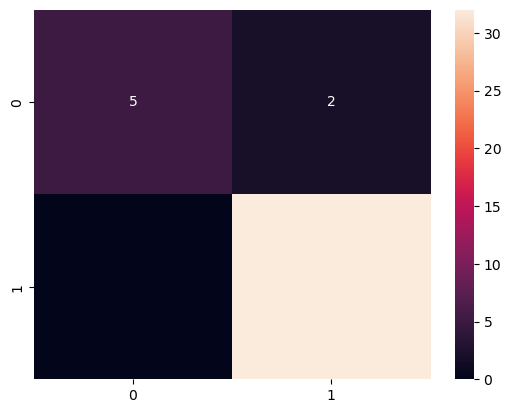

In [34]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) #print detailed performance metrics
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

Confusion Matrix Structure:
                Predicted 0     Predicted 1
Actual 0           TN               FP
Actual 1           FN               TP

Heatmap - to see how many samples were correctly vs. incorrectly predicted

Feature Importance

- These are available in models like Random Forest, which are based on trees.
- It tells how much each feature contributed to reducing error (how useful it was).
- Higher importance = that feature helped a lot in deciding if a person has PD.
- Ex: "MDVP:Fo(Hz)" has high importance - means fundamental frequency was highly relevant in detection.
- This is helpful in biomedical settings, as it tells you what biomarkers matter most -> good for explainability and trust.

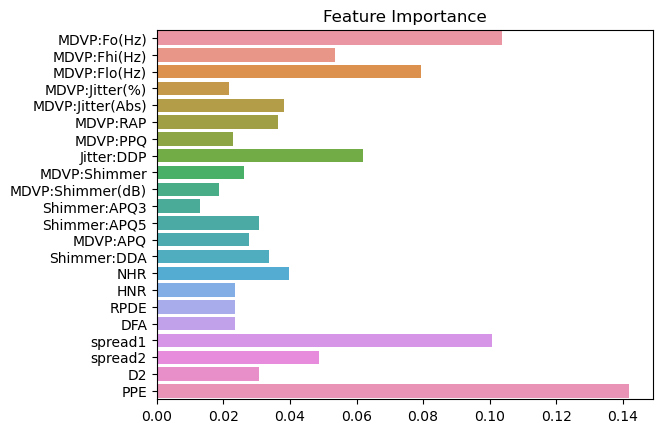

In [32]:
importances = model.feature_importances_  #get importance score of each feature
feature_names = X.columns  #get feature names
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()